In [7]:
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [8]:
(train_input,train_target),(test_input,test_target) = keras.datasets.imdb.load_data(
    num_words = 2000
)

In [9]:
print(train_input.shape, train_target.shape)

(25000,) (25000,)


In [10]:
# train의 20%를 val 세트로
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [11]:
# 시퀀스 패딩
# 글자수를 200으로 제한
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=300)
val_seq = pad_sequences(val_input, maxlen=300)

In [12]:
# train_oh = keras.utils.to_categorical(train_seq)
# val_oh = keras.utils.to_categorical(val_seq)

In [13]:
# 순환 신경망 모델 구현(Embedding)
model = keras.Sequential()
model.add(keras.layers.Embedding(2000,16,input_length=300))
model.add(keras.layers.SimpleRNN(8))
model.add(keras.layers.Dense(1,activation='sigmoid'))


c:\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
# 모델 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRNN200.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq,train_target,batch_size=64,epochs=100,
                    validation_data=(val_seq,val_target),
                    callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.5841 - loss: 0.6727 - val_accuracy: 0.7376 - val_loss: 0.6118
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.7411 - loss: 0.6014 - val_accuracy: 0.7658 - val_loss: 0.5757
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.7809 - loss: 0.5636 - val_accuracy: 0.7980 - val_loss: 0.5459
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8113 - loss: 0.5304 - val_accuracy: 0.8036 - val_loss: 0.5186
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8173 - loss: 0.5054 - val_accuracy: 0.8274 - val_loss: 0.4914
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8359 - loss: 0.4779 - val_accuracy: 0.8202 - val_loss: 0.4803
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8509 - loss: 0.4495 - val_accuracy: 0.8354 - val_loss: 0.4534
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8569 - loss: 0

In [16]:
model.evaluate(val_seq,val_target)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8606 - loss: 0.3493


[0.34009620547294617, 0.8664000034332275]

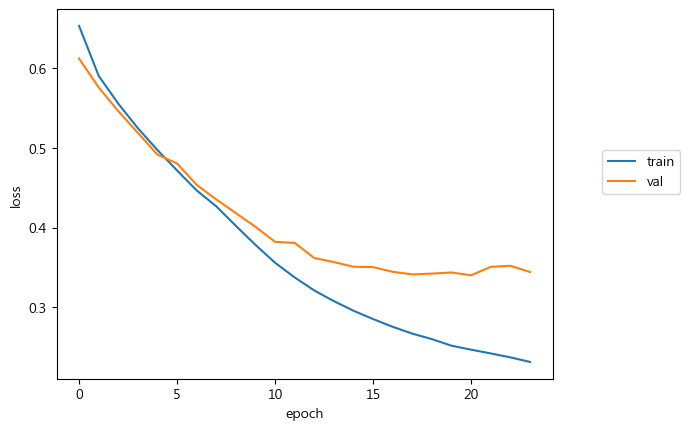

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'],loc=(1.1,0.5))

In [18]:
early_stopping_cb.stopped_epoch

23

In [19]:
# test 세트 검증
test_seq = pad_sequences(test_input,maxlen=200)

In [20]:
# test_oh = keras.utils.to_categorical(test_seq)

In [21]:
# test 세트 정확도
model.evaluate(test_seq,test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8554 - loss: 0.3468


[0.3464365601539612, 0.8566799759864807]

In [22]:
# 딥러닝 훈련 - 단어 임베딩
# 데이터전처리 train_seq = pad_sequences(train_input, maxlen=100)

# 모델결정 
# model2 = keras.Sequential()
# # 임베딩
# model2.add(keras.layers.Embedding(500,16,input_length=100))
# model2.add(keras.layers.SimpleRNN(8))
# model2.add(keras.layers.Dense(1, activation='sigmoid'))
# model.summary()

# 모델 훈련
# 모델설정 옵티마이저 - RMSprop
# rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
# model2.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
# checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRNN_embedding_model.keras')
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True )
# history = model2.fit(train_seq,train_target,batch_size=64,epochs=100,
#                     validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])
# 모델평가 model2.evaluate(val_seq,val_target)

# test 세트 검증
# test_seq = pad_sequences(test_input, maxlen=100)
# test 세트 정확도
# model.evaluate(test_seq,test_target)

# 임베딩
# model2 = keras.Sequential()
# model2.add(keras.layers.Embedding(500,16,input_length=100))
# model2.add(keras.layers.SimpleRNN(8))
# model2.add(keras.layers.Dense(1, activation='sigmoid'))